## Stats507 Homework6, Winter 2019
### Shuoran Li
#### shuoranl@umich.edu

I did not discuss problems with anyone else in the class on this homework.

Problem 1 took me 0.5 hour; Problem 2 took me 1 hour; Problem 3 took me 1 hour

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skellam

### Problem 1: Warmup: constructing pandas objects 

### 1.1 
#### Create a pandas Series object with indices given by the first 10 letters of the English alphabet and values given by the first 10 primes.

In [2]:
idx = ['a','b','c','d','e','f','g','h','i','j']
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
pd.Series(primes,idx)

a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64

### 1.2
#### Below is a table that might arise in a genetics experiment. Reconstruct this as a pandas DataFrame.

In [3]:
tuples = list(zip(*[['goat']*4+['bird']*4+['llama']*4,
                   ['A','A','a','a']*3,
                   ['A','a']*6]))
idx = pd.MultiIndex.from_tuples(tuples, names=['animal','parent1','parent2'])
numbers = np.array([list(range(1,13)),[2,4,4,6,6,8,8,10,10,12,12,14]])
pd.DataFrame(numbers.transpose(), index = idx, columns=['score1','score2'])

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

### Problem 2: Working with pandas DataFrames

### 2.1
#### Load files

In [4]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Number of data points
iris_df.shape[0]

150

In [6]:
# Data types of columns
iris_df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
# Column names
iris_df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [8]:
# Number of species
iris_df['Species'].nunique()

3

### 2.2
#### Correct entries of dataframe

In [9]:
# 35th
iris_df.iloc[34]=[4.9,3.1,1.5,0.2,'setosa']
# 38th
iris_df.iloc[37]=[4.9,3.6,1.4,0.1,'setosa']

### 2.3
#### Add columns

In [10]:
iris_df['Petal.Ratio']=iris_df['Petal.Length']/iris_df['Petal.Width']
iris_df['Sepal.Ratio']=iris_df['Sepal.Length']/iris_df['Sepal.Width']

### 2.4
#### Write out csv files

In [11]:
iris_df.to_csv('iris_corrected.csv')

### 2.5
#### Use a pandas aggregate operation to determine the mean, median, minimum, maxi- mum and standard deviation of the petal and sepal ratio for each of the three species in the data set.

In [12]:
g = iris_df[['Species','Petal.Ratio','Sepal.Ratio']].groupby('Species')
g.aggregate(['mean','median','min','max','std'])

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median       min   max       std        mean   
Species                                                                  
setosa        6.908000  7.000000  2.666667  15.0  2.854545    1.470188   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.118750  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

### Problem 3: Plotting Dataframes: Major League Baseball

### 3.1
#### Load dataframe and make some adjustments

In [13]:
mlb_df = pd.read_csv('GL2018.TXT',header = None)
mlb_df = mlb_df.rename(columns={9:'v_score',10:'h_score',4:'v_league',7:'h_league'})

### 3.2
#### Create plot

In [14]:
mlb_df['Same.League'] = (mlb_df['v_league']==mlb_df['h_league'])
mlb_df_cl = mlb_df[['v_score','h_score','v_league','h_league','Same.League']] # select out useful columns
mlb_df_samel = mlb_df_cl[mlb_df_cl['Same.League']==True]
mlb_df_NL = mlb_df_samel[mlb_df_samel['v_league']=='NL']
mlb_df_AL = mlb_df_samel[mlb_df_samel['v_league']=='AL']

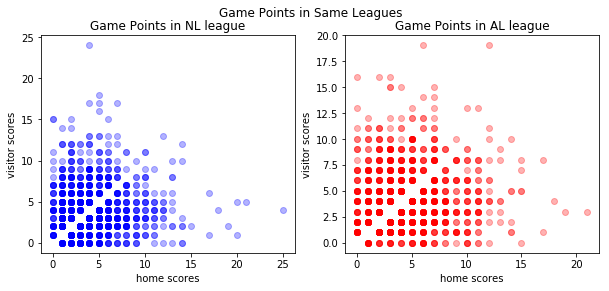

In [15]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('Game Points in Same Leagues')
plt.subplot(121)
plt.scatter(mlb_df_NL['h_score'],mlb_df_NL['v_score'],alpha=0.3,color='blue')
plt.title('Game Points in NL league')
plt.xlabel('home scores')
plt.ylabel('visitor scores')

plt.subplot(122)
plt.scatter(mlb_df_AL['h_score'],mlb_df_AL['v_score'],alpha=0.3,color='red')
plt.title('Game Points in AL league')
plt.xlabel('home scores')
plt.ylabel('visitor scores')
_=plt.show()

### 3.3
#### Make a histogram of this score difference and give the plot an appropriate title.

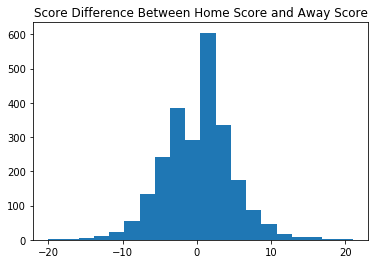

In [16]:
mlb_df['score_diff']=mlb_df['h_score']-mlb_df['v_score']
plt.hist(mlb_df['score_diff'],bins=20)
plt.title('Score Difference Between Home Score and Away Score')
_=plt.show()

### 3.4
####  Use scipy to run a Kolmogorov-Smirnov test assessing whether or not the Skellam distribution with parameters (μ1, μ2) = ($λ^ˆ_H , λ^ˆ_V$ ) and location parameter 0 is a good fit for the score differences.

In [17]:
lambda_h_est = mlb_df['h_score'].mean()
lambda_v_est = mlb_df['v_score'].mean()
stats.kstest(mlb_df['score_diff'],'skellam', args=(lambda_h_est,lambda_v_est,0))

KstestResult(statistic=0.2052406383420739, pvalue=0.0)

#### It's not a good fit using (μ1, μ2) = ($λ^ˆ_H , λ^ˆ_V$ ) as parameters. But Skellam distribution is a reasonable model to use, we just need to find better parameters, because there might be dependence between two Poisson random variables. So next step we need to do is to find correlation coefficient $\rho$ between two random variables.